<a href="https://colab.research.google.com/github/rahmanaul/Wholesale-GMM/blob/master/GMM_Wholesale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Memasukan data ke dataframe
df = pd.read_csv("Wholesale customers data.csv")
df.drop(labels=(['Channel','Region']),axis=1,inplace=True)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0
3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


In [ ]:
#melihat struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fresh             496 non-null    float64
 1   Milk              495 non-null    float64
 2   Grocery           496 non-null    float64
 3   Frozen            495 non-null    float64
 4   Detergents_Paper  495 non-null    float64
 5   Delicassen        496 non-null    float64
dtypes: float64(6)
memory usage: 23.6 KB


In [ ]:
#Melihat rentang angka di data dan ditemukan adanya nilai negative
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.960000e+02,4.950000e+02,4.960000e+02,4.950000e+02,4.950000e+02,4.960000e+02
mean,1.806676e+04,1.851574e+04,1.833829e+04,6.321590e+04,1.667034e+04,9.540163e+03
std,1.140949e+05,2.480502e+05,1.989876e+05,1.058266e+06,1.928313e+05,1.169039e+05
min,-1.732700e+04,-2.022300e+04,-2.157000e+04,-5.679000e+03,-1.178300e+04,-6.200000e+01
25%,2.855250e+03,1.532000e+03,2.146750e+03,6.595000e+02,2.650000e+02,3.750000e+02
50%,7.774500e+03,3.587000e+03,4.683500e+03,1.483000e+03,8.250000e+02,9.250000e+02
75%,1.630700e+04,7.051000e+03,1.041100e+04,3.559500e+03,3.909000e+03,1.824750e+03
max,2.337588e+06,5.433446e+06,4.323643e+06,2.323139e+07,3.232825e+06,2.321522e+06


In [ ]:
#Mengecek Nilai Null
df.isnull().sum()

Fresh               4
Milk                5
Grocery             4
Frozen              5
Detergents_Paper    5
Delicassen          4
dtype: int64

In [ ]:
#menghapus row yang ada nilai Null
df = df.dropna(how='any',axis=0) 
df.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [ ]:
(df > 0).all(1)

0       True
1       True
2       True
3       True
4       True
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 473, dtype: bool

In [ ]:
#menghapus row yang ada bilangan negative
df = df[(df > 0).all(1)]

In [ ]:
#kembali mengecek dataframe dan tidak lagi ada bilangan negative
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02
mean,1.913024e+04,1.979596e+04,1.949698e+04,6.833089e+04,1.794044e+04,1.018073e+04
std,1.189112e+05,2.584089e+05,2.074906e+05,1.102534e+06,2.008719e+05,1.218944e+05
min,2.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00
25%,3.082000e+03,1.483250e+03,2.127000e+03,6.842500e+02,2.557500e+02,4.047500e+02
50%,8.257500e+03,3.611500e+03,4.755500e+03,1.510500e+03,8.205000e+02,9.605000e+02
75%,1.693375e+04,7.190250e+03,1.065575e+04,3.590750e+03,4.003250e+03,1.820250e+03
max,2.337588e+06,5.433446e+06,4.323643e+06,2.323139e+07,3.232825e+06,2.321522e+06


In [ ]:
#menghitung z score untuk mencari outlier
z = np.abs(stats.zscore(df))
print(z)

[[5.43963700e-02 3.92830717e-02 5.75885989e-02 6.18499561e-02
  7.60843458e-02 7.26238500e-02]
 [1.01643070e-01 3.86864626e-02 4.79052488e-02 6.04443761e-02
  7.29993956e-02 6.90266300e-02]
 [1.07569955e-01 4.25682960e-02 5.69951500e-02 5.98605338e-02
  7.18880161e-02 1.91911709e-02]
 ...
 [1.57317059e-01 7.32859182e-02 8.41297593e-02 6.18045562e-02
  8.79656404e-02 5.19936489e+00]
 [2.25814593e-02 5.25053248e-02 6.33831697e-02 6.12960777e-02
  1.31348188e+01 6.71458917e-02]
 [1.16578146e-01 2.51039196e-02 4.35203310e-03 1.58020434e+00
  4.57930251e-02 8.22000110e-02]]


In [ ]:
#mengecek data Outlier
threshold = 3
print(np.where(z > 3))

(array([355, 356, 357, 359, 360, 445, 446, 447, 449, 450, 451, 453, 454]), array([0, 1, 2, 4, 5, 3, 5, 4, 0, 2, 1, 5, 4]))


In [ ]:
print(z[355][2])

0.09405917360641866


In [ ]:
#menghapus outlier
df_o= df[(z < 3).all(axis=1)]

In [ ]:
df.shape

(456, 6)

In [ ]:
df_o.shape

(443, 6)

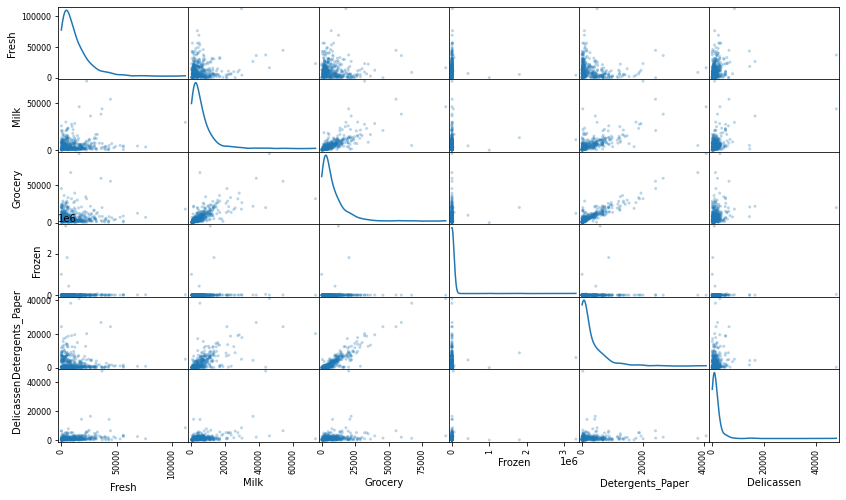

In [ ]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(df_o, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [ ]:
#mencoba menggunakan iQR untuk mencari outlier
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Fresh               13851.75
Milk                 5707.00
Grocery              8528.75
Frozen               2906.50
Detergents_Paper     3747.50
Delicassen           1415.50
dtype: float64


In [ ]:
test1 = df < (Q1 - 1.5 * IQR)
test2 = df > (Q3 + 1.5 * IQR)
print(test1 | test2)
df_out = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0    False  False    False   False             False       False
1    False  False    False   False             False       False
2    False  False    False   False             False        True
3    False  False    False   False             False       False
4    False  False    False   False             False        True
..     ...    ...      ...     ...               ...         ...
483  False   True    False   False             False       False
484  False  False    False    True             False       False
485  False  False    False   False             False        True
486  False  False    False   False              True       False
487  False  False    False    True             False       False

[456 rows x 6 columns]


(334, 6)

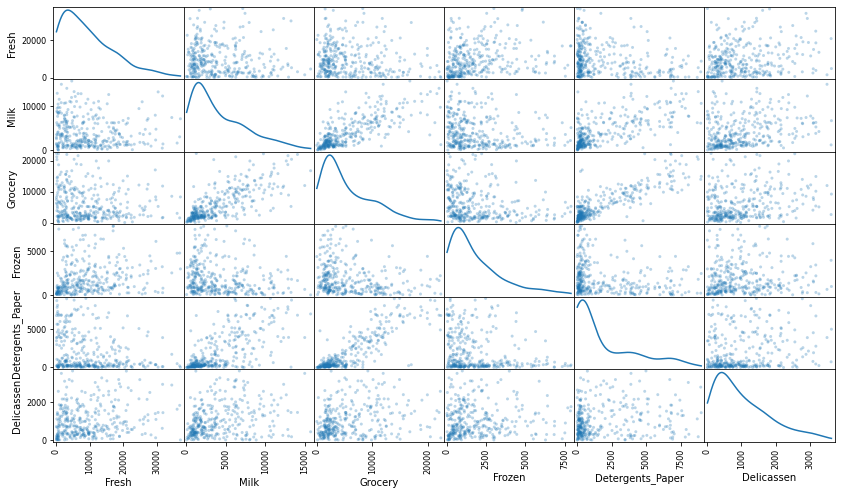

In [ ]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(df_out, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

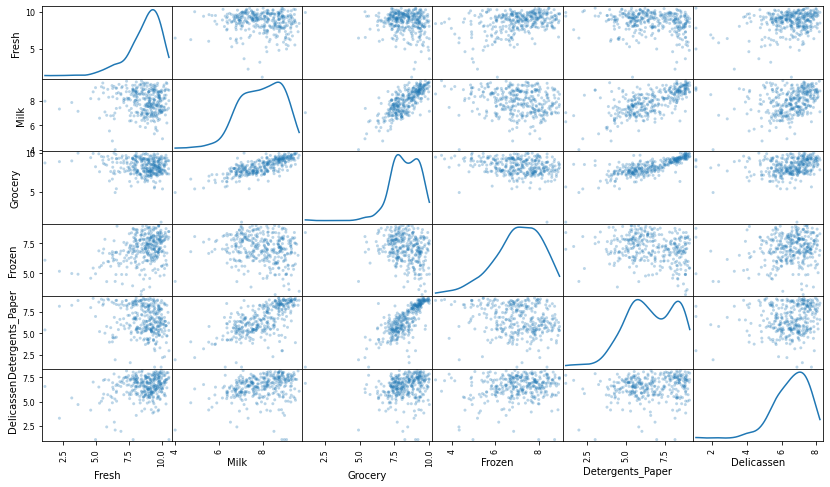

In [ ]:
# Scale the data using the natural logarithm
log_data = np.log(df_out.copy())

# Scale the sample data using the natural logarithm
#log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

array([0.45771816, 0.71087816, 0.82187303, 0.92245461, 0.9731082 ,
       1.        ])

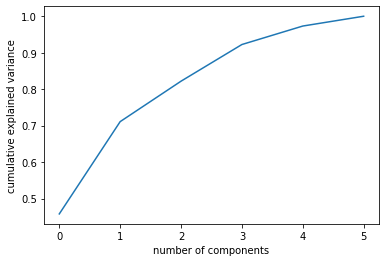

In [ ]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=len(log_data.columns)).fit(log_data)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

np.cumsum(pca.explained_variance_ratio_)
# TODO: Transform log_samples using the PCA fit above
#pca_samples = pca.transform(log_samples)

In [ ]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(log_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(log_data)

# TODO: Transform log_samples using the PCA fit above
#pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.45771816, 0.71087816])

In [ ]:
reduced_data.head()

,Dimension 1,Dimension 2
0,-1.968225,-0.747494
1,-1.967491,-1.308024
2,0.976712,-1.665370
3,-1.281459,-0.894624
4,-1.405989,-0.415263


In [ ]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Explained variation overall: {}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.45771816 0.25316001]
Explained variation overall: 0.7108781618630076


In [ ]:
from sklearn.mixture import GaussianMixture as GMM
from sklearn.metrics import silhouette_score
# Create range of clusters 
range_n_clusters = list(range(2,11))
print(range_n_clusters)

best_num_clusters = 0
best_score = 0

# Loop through clusters
for n_clusters in range_n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GMM(n_components=n_clusters).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    #sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='mahalanobis')
    print("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

[2, 3, 4, 5, 6, 7, 8, 9, 10]
For n_clusters = 2. The average silhouette_score is : 0.3599115972384071
For n_clusters = 3. The average silhouette_score is : 0.40018242541315985
For n_clusters = 4. The average silhouette_score is : 0.35890338672753636
For n_clusters = 5. The average silhouette_score is : 0.24973712727271405
For n_clusters = 6. The average silhouette_score is : 0.3331142606693174
For n_clusters = 7. The average silhouette_score is : 0.28626441311515777
For n_clusters = 8. The average silhouette_score is : 0.359656765426458
For n_clusters = 9. The average silhouette_score is : 0.3018643409255526
For n_clusters = 10. The average silhouette_score is : 0.32165730805655507


In [ ]:
# Extra code because we ran a loop on top and this resets to what we want
clusterer = GMM(n_components=3).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
#sample_preds = clusterer.predict(pca_samples)

In [ ]:
import matplotlib.cm as cm
def cluster_results(reduced_data, preds, centers):
	'''
	Visualisasi data yang telah di reduced dan center datanya
	'''

	predictions = pd.DataFrame(preds, columns = ['Cluster'])
	plot_data = pd.concat([predictions, reduced_data], axis = 1)

	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = cm.get_cmap('gist_rainbow')

	# Color the points based on assigned cluster
	for i, cluster in plot_data.groupby('Cluster'):   
	    cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
	                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

	# Plot centers with indicators
	for i, c in enumerate(centers):
	    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
	               alpha = 1, linewidth = 2, marker = 'o', s=200);
	    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

	# Plot transformed sample points 
	#ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
	           #s = 150, linewidth = 4, color = 'black', marker = 'x');

	# Set plot title
	ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");

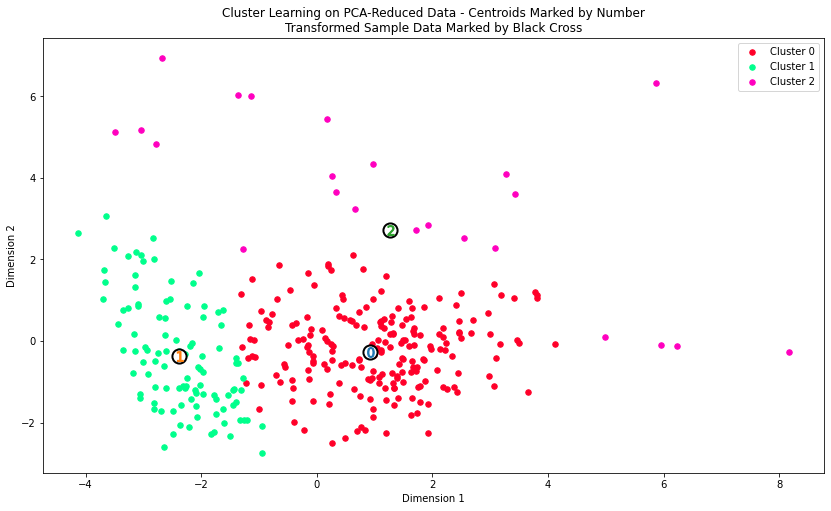

In [ ]:
cluster_results(reduced_data, preds, centers)

In [ ]:
dataset = df_out.copy()
dataset['Cluster'] = preds
dataset.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0,1
1,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0,1
3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,0
5,9413.0,8259.0,5126.0,666.0,1795.0,1451.0,1
6,12126.0,3199.0,6975.0,480.0,3140.0,545.0,1


In [ ]:
dataset.groupby('Cluster')[['Cluster']].count()

,Cluster
Cluster,
0,208
1,103
2,23


In [ ]:
dataset.groupby('Cluster').mean().style.bar(align='mid', color=['#d65f5f', '#5fba7d'])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,11094.562500,2624.860577,3264.326923,2294.865385,597.629808,893.956731
1,7955.174757,7715.524272,11690.475728,1288.029126,4938.029126,1431.660194
2,3410.608696,1896.913043,3931.434783,1053.826087,1064.130435,338.173913


In [ ]:
dataset.groupby('Cluster').mean().style.background_gradient(cmap='viridis')

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,11094.562500,2624.860577,3264.326923,2294.865385,597.629808,893.956731
1,7955.174757,7715.524272,11690.475728,1288.029126,4938.029126,1431.660194
2,3410.608696,1896.913043,3931.434783,1053.826087,1064.130435,338.173913
